In [3]:
%pip install emoji
import pandas as pd
import numpy as np
import re
import nltk
import random
nltk.download('punkt')
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer  
from nltk.tokenize import word_tokenize, sent_tokenize
import emoji
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words=set(stopwords.words('english'))
from gensim.utils import simple_preprocess

# Doc2Vec model
import gensim
from gensim.parsing.preprocessing import preprocess_documents
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from collections import defaultdict


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khauv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khauv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khauv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\khauv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
df = pd.read_csv('question_responce.csv')
df.head


<bound method NDFrame.head of       Unnamed: 0                                           responce  \
0            603  @115904 We'll be sure to pass along your kind ...   
1            605  @115904 Our apologies for the delay in respond...   
2            608  @115905 Aww, that's definitely a future pilot ...   
3            612          @115906 We're sorry for your frustration.   
4            618  @115909 We're glad you got to kick back and en...   
...          ...                                                ...   
1847      201947  @172376 We know staying connected is important...   
1848      203418  @172677 We've capped our fares for nonstop fli...   
1849      203504  @143005 Please give our Baggage team a call at...   
1850      203506  @143005 Our apologies for the hold. Our Centra...   
1851      203633  @172730 We're providing waivers for St Croix, ...   

                                               question  
0     @AmericanAir Erica on the lax team is amazing ...  
1

# Preprocessing

In [7]:
def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)
    
def preprocess(string):
    emoticon_string = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth      
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
    )"""
    string = re.sub(r'\s+', ' ', string)
    string = re.sub(r'\[[0-9]*\]', '', string)
    string = re.sub(r'(@([A-Za-z0-9`~!@#$%^&*()_|+\-=?;:\'",.<>\{\}\[\]\\\/]{2,32}))', '', string) # remove tags
    string = re.sub(r'\d+', '', string) # remove numbers
    string = re.sub(r'\#+', '', string) # remove hashtags
    string = re.sub(r'http\S+', '', string) # remove urls
    string = re.sub(emoticon_string,'', string)# remove emojis
    string = simple_preprocess(string,deacc=True) #tokenizing, lowercasing, removing accents

    result = []
    lemma_function = WordNetLemmatizer()
    lemma = [lemma_function.lemmatize(w) for w in string if w not in stop_words and len(w) > 3]
    return lemma

text_data = [] 
text_data = df['question'].apply(preprocess) #preprocessing

print(text_data)

0                     [erica, team, amazing, give, raise]
1       [could, someone, team, available, guide, gate,...
2       [tennyson, american, airline, pilot, trunkortr...
3       [right, earned, also, pas, spouse, need, chang...
4       [thank, playing, thisisus, great, flight, atte...
                              ...                        
1847    [nailed, transatlantic, wifi, service, able, j...
1848                             [average, price, ticket]
1849    [really, annoyed, month, since, damaged, claim...
1850    [terrible, service, wait, age, trying, call, n...
1851    [charge, patron, change, flight, every, time, ...
Name: question, Length: 1852, dtype: object


# Intents / Topic Modelling

In [55]:
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools


In [8]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]


import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

### LdaModel

In [57]:
import gensim
NUM_TOPICS = 100
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(24, '0.035*"seat" + 0.023*"thanks" + 0.023*"year" + 0.012*"sorry"')
(65, '0.025*"time" + 0.021*"flight" + 0.012*"issue" + 0.012*"even"')
(81, '0.018*"flight" + 0.012*"excited" + 0.012*"airport" + 0.012*"would"')
(1, '0.020*"flight" + 0.017*"back" + 0.015*"gate" + 0.015*"delay"')
(99, '0.024*"flight" + 0.018*"time" + 0.016*"thanksgiving" + 0.016*"gate"')
(54, '0.044*"delayed" + 0.033*"flight" + 0.033*"people" + 0.022*"plane"')
(61, '0.025*"take" + 0.019*"time" + 0.019*"flight" + 0.013*"book"')
(77, '0.037*"flight" + 0.020*"seat" + 0.012*"connection" + 0.012*"take"')
(79, '0.034*"flight" + 0.027*"wifi" + 0.020*"seat" + 0.020*"know"')
(30, '0.032*"flight" + 0.021*"please" + 0.016*"phone" + 0.016*"seat"')
(28, '0.038*"flagship" + 0.019*"congratulation" + 0.019*"first" + 0.019*"admiralsclub"')
(19, '0.034*"flight" + 0.019*"together" + 0.019*"gate" + 0.018*"plane"')
(58, '0.048*"flight" + 0.025*"know" + 0.019*"information" + 0.019*"give"')
(43, '0.056*"flight" + 0.025*"time" + 0.014*"first"

La niveau de cohérence est assez pas. Passons au LdaMallet qui doit donner de meilleurs résultats.

### LdaMallet

In [14]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'C:/Users/khauv/Documents/Github/Rule-based-chatbot/mallet-2.0.8/'
mallet_path = 'C:/Users/khauv/Documents/Github/Rule-based-chatbot/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=dictionary)

# Show Topics
print(ldamallet.show_topics(formatted=False))


[(14, [('trip', 0.07060755336617405), ('good', 0.06896551724137931), ('year', 0.06239737274220033), ('work', 0.04597701149425287), ('flying', 0.042692939244663386), ('return', 0.027914614121510674), ('people', 0.022988505747126436), ('awful', 0.019704433497536946), ('card', 0.019704433497536946), ('paying', 0.0180623973727422)]), (3, [('great', 0.11248073959938366), ('flying', 0.06933744221879815), ('thanksgiving', 0.05546995377503852), ('happy', 0.05084745762711865), ('home', 0.04930662557781202), ('guy', 0.03697996918335902), ('hope', 0.032357473035439135), ('dallas', 0.020030816640986132), ('friend', 0.01848998459167951), ('screen', 0.012326656394453005)]), (15, [('travel', 0.0904836193447738), ('issue', 0.07644305772230889), ('love', 0.046801872074883), ('holiday', 0.046801872074883), ('family', 0.0327613104524181), ('maintenance', 0.0234009360374415), ('food', 0.0218408736349454), ('real', 0.0202808112324493), ('awesome', 0.0202808112324493), ('employee', 0.0202808112324493)]), (0

NameError: name 'CoherenceModel' is not defined

- Fonction pour evaluer le niveau de cohérence du model

In [15]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.5714557358509211


- Fonction pour évaluer le niveau de cohérence du model dans un interval donnée de nombres de topics

In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

- Graphique entre la cohérence et le nombre de topics

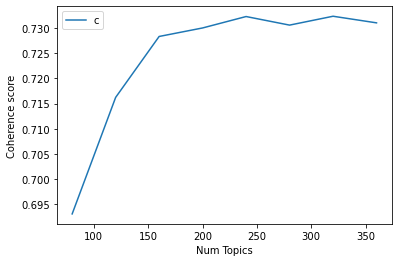

In [22]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_data, start=80, limit=400, step=40)
import matplotlib.pyplot as plt
# Show graph
limit=400; start=80; step=40;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

On choisit le nombre de topics là où la courbe commence à stabiliser, ici 240.

- Les 240 topics du model que l'on a choisit

In [23]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(76, '0.154*"gate" + 0.077*"allowing" + 0.077*"missed" + 0.077*"boarding" + 0.058*"send" + 0.058*"load" + 0.038*"actual" + 0.038*"promised" + 0.038*"service" + 0.038*"left"'), (91, '0.222*"luggage" + 0.181*"baggage" + 0.069*"delta" + 0.056*"hard" + 0.056*"day" + 0.042*"smooth" + 0.042*"line" + 0.028*"traveling" + 0.014*"absolute" + 0.014*"band"'), (170, '0.288*"flight" + 0.091*"make" + 0.045*"power" + 0.045*"long" + 0.045*"traveling" + 0.030*"esta" + 0.030*"crap" + 0.015*"harbor" + 0.015*"manage" + 0.015*"held"'), (139, '0.360*"airline" + 0.348*"american" + 0.045*"favorite" + 0.022*"offering" + 0.022*"extra" + 0.022*"detail" + 0.011*"offical" + 0.011*"aspect" + 0.011*"jamaica" + 0.011*"merger"'), (58, '0.200*"voucher" + 0.077*"tweet" + 0.046*"paying" + 0.046*"info" + 0.031*"fargo" + 0.031*"feel" + 0.031*"catering" + 0.015*"europe" + 0.015*"halfway" + 0.015*"circumstance"'), (95, '0.267*"family" + 0.147*"response" + 0.133*"issue" + 0.027*"advance" + 0.027*"faster" + 0.013*"reaching" + 

- Attribution des topics pour tous les messages du dataset dans un même dataframe

In [24]:
def format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df.question.values.tolist())

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,168.0,0.0207,"amazing, helpful, mother, sweet, reply, told, ...",@AmericanAir Erica on the lax team is amazing ...
1,1,7.0,0.0149,"giving, team, policy, glitch, completely, love...",@AmericanAir Could you have someone on your la...
2,2,139.0,0.0330,"airline, american, favorite, offering, extra, ...",Ben Tennyson and an American Airlines pilot. 🎃...
3,3,57.0,0.0187,"attendant, flyer, nice, frequent, program, lie...","@AmericanAir Right, but I earned those. I also..."
4,4,112.0,0.0177,"flight, playing, helpful, earlier, stop, guy, ...","Thank you, @AmericanAir for playing #ThisIsUs ..."
5,5,179.0,0.0438,"wifi, flew, flight, inflight, working, connect...",@AmericanAir's wifi makes Amtrak's wifi look p...
6,6,1.0,0.0551,"club, admiral, worried, back, terminal, online...",Wonderful club! @americanair (@ American Airli...
7,7,0.0,0.0141,"cancel, miami, counter, member, hour, expect, ...","@AmericanAir already did...changed browsers, d..."
8,8,38.0,0.0149,"extra, hold, specific, home, handled, drink, r...",@AmericanAir ........still....on....hold.....t...
9,9,71.0,0.0382,"told, passenger, additional, reschedule, limit...",@AmericanAir well now i am told the ticket cos...


# Process

- Input de l'utilisateur et son topic (A faire)

In [40]:
userinput=preprocess("@AmericanAir Erica on the lax team is amazing give her a raise ty")
dictionaryInput = corpora.Dictionary([userinput])
corpusInput = [dictionary.doc2bow(userinput)]

df_topic_test = format_topics_sentences(ldamodel=optimal_model, corpus=corpusInput, texts="@AmericanAir Erica on the lax team is amazing give her a raise ty")

# Format
df_dominant_topic_test = df_topic_test.reset_index()
df_dominant_topic_test.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic_test.head()


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,168.0,0.0207,"amazing, helpful, mother, sweet, reply, told, ...",@AmericanAir Erica on the lax team is amazing ...


- Ajout de la colonne 'responce' dans le dataframe réalisé precedemment contenant les questions et leur topic

In [42]:
complete_df= df.join(df_dominant_topic, lsuffix='_database', rsuffix='_input')
complete_df.head()

,Unnamed: 0,responce,question,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,603,@115904 We'll be sure to pass along your kind ...,@AmericanAir Erica on the lax team is amazing ...,0,168.0,0.0207,"amazing, helpful, mother, sweet, reply, told, ...",@AmericanAir Erica on the lax team is amazing ...
1,605,@115904 Our apologies for the delay in respond...,@AmericanAir Could you have someone on your la...,1,7.0,0.0149,"giving, team, policy, glitch, completely, love...",@AmericanAir Could you have someone on your la...
2,608,"@115905 Aww, that's definitely a future pilot ...",Ben Tennyson and an American Airlines pilot. 🎃...,2,139.0,0.0330,"airline, american, favorite, offering, extra, ...",Ben Tennyson and an American Airlines pilot. 🎃...
3,612,@115906 We're sorry for your frustration.,"@AmericanAir Right, but I earned those. I also...",3,57.0,0.0187,"attendant, flyer, nice, frequent, program, lie...","@AmericanAir Right, but I earned those. I also..."
4,618,@115909 We're glad you got to kick back and en...,"Thank you, @AmericanAir for playing #ThisIsUs ...",4,112.0,0.0177,"flight, playing, helpful, earlier, stop, guy, ...","Thank you, @AmericanAir for playing #ThisIsUs ..."


- Filtrage du dataframe selon un topic

In [48]:
oui = complete_df[complete_df['Dominant_Topic']==168.0]
oui.head()

,Unnamed: 0,responce,question,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,603,@115904 We'll be sure to pass along your kind ...,@AmericanAir Erica on the lax team is amazing ...,0,168.0,0.0207,"amazing, helpful, mother, sweet, reply, told, ...",@AmericanAir Erica on the lax team is amazing ...
240,29889,@124348 We sure will!,@AmericanAir Please recognize her. She is amaz...,240,168.0,0.0176,"amazing, helpful, mother, sweet, reply, told, ...",@AmericanAir Please recognize her. She is amaz...
611,76131,@137430 We think so too!,@AmericanAir She is AMAZING!,611,168.0,0.0202,"amazing, helpful, mother, sweet, reply, told, ...",@AmericanAir She is AMAZING!
712,85174,@140099 It makes us so happy that you're recog...,@AmericanAir Great job at the MIA to CHS on fl...,712,168.0,0.0217,"amazing, helpful, mother, sweet, reply, told, ...",@AmericanAir Great job at the MIA to CHS on fl...
838,100753,@135984 That is AAwesome. Have a great night.,@AmericanAir I sure did 😃 it was absolutely am...,838,168.0,0.0352,"amazing, helpful, mother, sweet, reply, told, ...",@AmericanAir I sure did 😃 it was absolutely am...
